### 梯度检查

在本节中，我们将学习怎么样进行梯度检查。

假设你现在是一个全球移动支付团队中的一员，现在需要建立一个深度学习模型去判断用户账户在进行付款的时候是否是被黑客入侵的。

但是，在我们执行反向传播的计算过程中，反向传播函数的计算过程是比较复杂的。为了验证我们得到的反向传播函数是否正确，现在你需要编写一些代码来验证反向传播函数的正确性。

In [1]:
import numpy as np

# 我们后面要用到的函数

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

def dictionary_to_vector(parameters):
    """
    Roll all our parameters dictionary into a single vector satisfying our specific required shape.
    """
    keys = []
    count = 0
    for key in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        
        # flatten parameter
        new_vector = np.reshape(parameters[key], (-1,1))
        keys = keys + [key]*new_vector.shape[0]
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta, keys

def vector_to_dictionary(theta):
    """
    Unroll all our parameters dictionary from a single vector satisfying our specific required shape.
    """
    parameters = {}
    parameters["W1"] = theta[:20].reshape((5,4))
    parameters["b1"] = theta[20:25].reshape((5,1))
    parameters["W2"] = theta[25:40].reshape((3,5))
    parameters["b2"] = theta[40:43].reshape((3,1))
    parameters["W3"] = theta[43:46].reshape((1,3))
    parameters["b3"] = theta[46:47].reshape((1,1))

    return parameters

def gradients_to_vector(gradients):
    """
    Roll all our gradients dictionary into a single vector satisfying our specific required shape.
    """
    
    count = 0
    for key in ["dW1", "db1", "dW2", "db2", "dW3", "db3"]:
        # flatten parameter
        new_vector = np.reshape(gradients[key], (-1,1))
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta

## 怎么做梯度检查

反向传播计算梯度 $\frac{\partial J}{\partial \theta}$, 这里 $\theta$ 是模型的参数. $J$ 是由前向传播计算得到的代价函数.

因为前向传播实现起来相对简单, 你很容易就确认它的正确性, 确认你的代价计算 $J$ 是正确的. 然后, 你可以用计算 $J$ 的代码来验证计算 $\frac{\partial J}{\partial \theta}$ 的代码. 

回顾一下导数（或梯度）的定义:
$$ \frac{\partial J}{\partial \theta} = \lim_{\varepsilon \to 0} \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon} \tag{1}$$

更多:

- $\frac{\partial J}{\partial \theta}$ 目标是确保它的正确性. 
- 可以计算 $J(\theta + \varepsilon)$ 和 $J(\theta - \varepsilon)$ (在此t $\theta$ 是一个实数), 首先确保 $J$ 是正确. 

我们用一个很小的 $\varepsilon$ 值去确认  $\frac{\partial J}{\partial \theta}$ 的计算是正确的!

接下来，我们首先看下一维线性模型的梯度检查：

假设线性方程是 $J(\theta) = \theta x$.  $\theta$ 是一个实数参数,  $x$ 是输入变量.

我们讲实现函数 $J(.)$ 和 它的导数 $\frac{\partial J}{\partial \theta}$. 然后用梯度检查确保 对 $J$ 求导是正确的. 

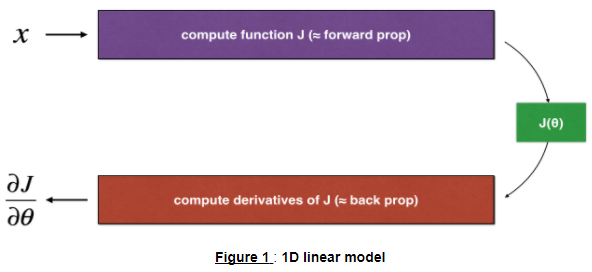

In [2]:
# 前向传播

def forward_propagation(x, theta):
    """
    Implement the linear forward propagation (compute J) presented in Figure 1 (J(theta) = theta * x)
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    
    Returns:
    J -- the value of function J, computed using the formula J(theta) = theta * x
    """
    
    ### START CODE HERE ### (approx. 1 line)
    J = theta * x
    ### END CODE HERE ###
    
    return J


计算  J(θ)=θxJ(θ)=θx  在  θθ 的导数. 公式很简单  dtheta=∂J∂θ=xdtheta=∂J∂θ=x .

In [3]:
#反向传播

def backward_propagation(x, theta):
    """
    Computes the derivative of J with respect to theta (see Figure 1).
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    
    Returns:
    dtheta -- the gradient of the cost with respect to theta
    """
    
    ### START CODE HERE ### (approx. 1 line)
    dtheta = x
    ### END CODE HERE ###
    
    return dtheta

接下来，梯度检查的步骤如下：

- 先通过上面的公式和一个极小的  $\varepsilon$ 计算 "gradapprox" . 步骤如下:
    1. $\theta^{+} = \theta + \varepsilon$
    2. $\theta^{-} = \theta - \varepsilon$
    3. $J^{+} = J(\theta^{+})$
    4. $J^{-} = J(\theta^{-})$
    5. $gradapprox = \frac{J^{+} - J^{-}}{2  \varepsilon}$
- 接着用反向传播计算梯度, 把结果存在变量 "grad" 中
- 最后, 用下面的公式计算 "gradapprox" 和 the "grad" 的差值:
$$ difference = \frac {\mid\mid grad - gradapprox \mid\mid_2}{\mid\mid grad \mid\mid_2 + \mid\mid gradapprox \mid\mid_2} \tag{2}$$
同样的你需要3步计算这个公式:
   - 1'. 计算分子 np.linalg.norm(...) 计算范数
   - 2'. 计算分母. 
   - 3'. 相除.
- 如果差值小于 (比如 $10^{-7}$), 我们就能确定梯度计算是正确的. 否则可能有错

In [4]:
def gradient_check(x, theta, epsilon = 1e-7):
    """
    Implement the backward propagation presented in Figure 1.
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Compute gradapprox using left side of formula (1). epsilon is small enough, you don't need to worry about the limit.
    ### START CODE HERE ### (approx. 5 lines)
    thetaplus = theta + epsilon                           # Step 1
    thetaminus = theta - epsilon                              # Step 2
    J_plus = x * (theta + epsilon)                                  # Step 3
    J_minus = x * (theta - epsilon)                                 # Step 4
    gradapprox = (J_plus - J_minus) / 2 / epsilon           # Step 5
    ### END CODE HERE ###
    
    # Check if gradapprox is close enough to the output of backward_propagation()
    ### START CODE HERE ### (approx. 1 line)
    grad = backward_propagation(x, theta)
    ### END CODE HERE ###
    
    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm(grad - gradapprox)                               # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)          # Step 2'
    difference = numerator / denominator                  # Step 3'
    ### END CODE HERE ###
    
    if difference < 1e-7:
        print ("The gradient is correct!")
    else:
        print ("The gradient is wrong!")
    
    return difference

In [5]:
# 测试一下吧

x, theta = 2, 4
difference = gradient_check(x, theta)
print("difference = " + str(difference))

The gradient is correct!
difference = 2.91933588329e-10


一般情况是 代价函数  JJ  有多个维度输入. 当我们训练神经网络是,  θθ 实际上包含多个  W[l]W[l] 矩阵 和 偏差  b[l]b[l] ! 让我们学习下多维度下的梯度检查

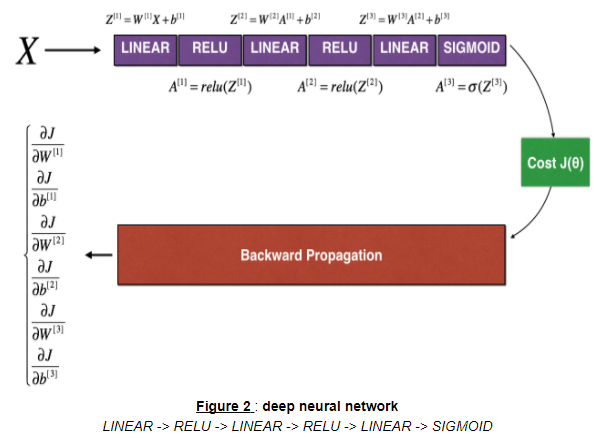

In [6]:
# 前向传播

def forward_propagation_n(X, Y, parameters):
    """
    Implements the forward propagation (and computes the cost) presented in Figure 3.
    
    Arguments:
    X -- training set for m examples
    Y -- labels for m examples 
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (5, 4)
                    b1 -- bias vector of shape (5, 1)
                    W2 -- weight matrix of shape (3, 5)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    
    Returns:
    cost -- the cost function (logistic cost for one example)
    """
    
    # retrieve parameters
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
 
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
 
    # Cost
    logprobs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache

In [7]:
# 反向传播

def backward_propagation_n(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
 
    Arguments:
    X -- input datapoint, of shape (input size, 1)
    Y -- true "label"
    cache -- cache output from forward_propagation_n()
    
    Returns:
    gradients -- A dictionary with the gradients of the cost with respect to each parameter, activation and pre-activation variables.
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
 
    return gradients

那么梯度检查是如何工作的？

公式任然试用：

$$ \frac{\partial J}{\partial \theta} = \lim_{\varepsilon \to 0} \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon} \tag{1}$$

但是, 这里的 $\theta$ 不再是一个标量. 而是一个被称为参数 "parameters" 的字典. 上面提供了一个方法 "`dictionary_to_vector()`" 用来将 "parameters" 字典 转换成一个向量，我们称值 "values", 通过reshape参数 (W1, b1, W2, b2, W3, b3) 转化成向量，然后再拼成一个向量.

逆操作函数 "`vector_to_dictionary`" 将整个向量再解析成参数字典 "parameters".

如图：

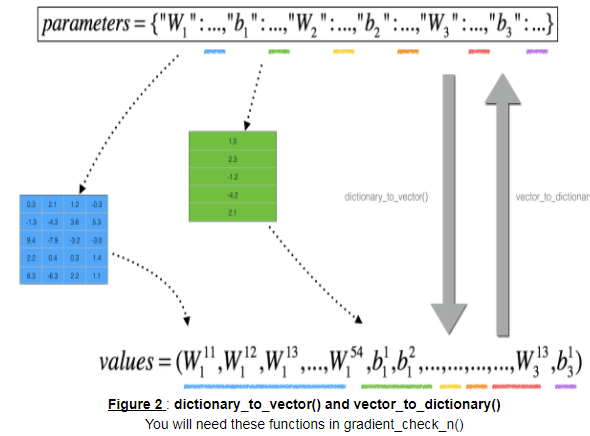

**步骤**: 

下面的假想程序将帮助你实现梯度检查.

For each i in num_parameters:
- To compute `J_plus[i]`:
    1. Set $\theta^{+}$ to `np.copy(parameters_values)`
    2. Set $\theta^{+}_i$ to $\theta^{+}_i + \varepsilon$
    3. Calculate $J^{+}_i$ using to `forward_propagation_n(x, y, vector_to_dictionary(`$\theta^{+}$ `))`.     
- To compute `J_minus[i]`: do the same thing with $\theta^{-}$
- Compute $gradapprox[i] = \frac{J^{+}_i - J^{-}_i}{2 \varepsilon}$

最后, 你的到一个gradapprox向量, 其中gradapprox[i] 是一个在 `parameter_values[i]` 的梯度近似值. 你可以比较这个向量和反向传播的结果. 计算差值: 
$$ difference = \frac {\| grad - gradapprox \|_2}{\| grad \|_2 + \| gradapprox \|_2 } \tag{3}$$

In [8]:
def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):
    """
    Checks if backward_propagation_n computes correctly the gradient of the cost output by forward_propagation_n
    
    Arguments:
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
    grad -- output of backward_propagation_n, contains gradients of the cost with respect to the parameters. 
    x -- input datapoint, of shape (input size, 1)
    y -- true "label"
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        ### START CODE HERE ### (approx. 3 lines)
        thetaplus = np.copy(parameters_values)                                      # Step 1
        thetaplus[i][0] = thetaplus[i][0] + epsilon                               # Step 2
        J_plus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaplus))                                   # Step 3
        ### END CODE HERE ###
        
        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        ### START CODE HERE ### (approx. 3 lines)
        thetaminus = np.copy(parameters_values)                                     # Step 1
        thetaminus[i][0] = thetaminus[i][0] - epsilon                                # Step 2        
        J_minus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus))                       # Step 3
        ### END CODE HERE ###
        
        # Compute gradapprox[i]
        ### START CODE HERE ### (approx. 1 line)
        gradapprox[i] = (J_plus[i] - J_minus[i]) / 2 / epsilon
        ### END CODE HERE ###
    
    # Compare gradapprox to backward propagation gradients by computing difference.
    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm(grad - gradapprox)                               # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)          # Step 2'
    difference = numerator / denominator                  # Step 3'                                    # Step 3'
    ### END CODE HERE ###
 
    if difference > 1e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [10]:
# 尝试一下

def gradient_check_n_test_case(): 
    np.random.seed(1)
    x = np.random.randn(4,3)
    y = np.array([1, 1, 0])
    W1 = np.random.randn(5,4) 
    b1 = np.random.randn(5,1) 
    W2 = np.random.randn(3,5) 
    b2 = np.random.randn(3,1) 
    W3 = np.random.randn(1,3) 
    b3 = np.random.randn(1,1) 
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    
    return x, y, parameters

X, Y, parameters = gradient_check_n_test_case()

cost, cache = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)
difference = gradient_check_n(parameters, gradients, X, Y)

There is a mistake in the backward propagation! difference = 1.18904178788e-07


**注意** 
- 梯度检查是很慢的! 计算近似值 $\frac{\partial J}{\partial \theta} \approx  \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon}$ 开销很大. 因此我们不能在每次训练都做梯度检查. 只在需要的时候用来检查正确性. 
- 我们这次举例的梯度检查不支持dropout. 你要先禁掉dropout再尝试梯度检查，完成后再开启. 